# Binning reflectivity by height

I write a function that will take a raster image of values of interest and a raster image of altitudes above the ground as input and will return the reflectivity binned by height.

In [8]:
import rasterio as rast
from rasterio.plot import show
from rasterio.transform import Affine
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import os

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    pl.ion()

In [10]:
def BinnedRefl(altrast1, dBZrast1, lower1, upper1, width1):
    """This function takes an altitude raster, a dBZ raster, and some scalar arguments that dictate how the altitudinal bins are set up: 
    lower1 is the cntre of the lowest bin, upper1 is the centre of the highest bin, and width in the bin width. Note that when upper1 - lower1
    is divided by width1, we should obtain an integer number of bins. If this is not the case, the algorithm makes it so.
    
    Note also that the altrast1 and dBZrast1 arrays must have the same dimension, otherwise this won't work"""
    # First replacing values less than or equal to -32.0 in the reflectivity array with nan
    dBZrast1[dBZrast1 <= -32.0] = np.nan
    
    nbins = int(np.floor((upper1 - lower1)/width1)) # calculating the number of bins
    bincentres = np.linspace(lower1, upper1, num = nbins + 1) # bin centres
    upperarray = np.array(upper1 + np.floor(width1/2)) # an array for only the last value
    binbounds = np.hstack((bincentres - np.floor(width1/2), upperarray)) # bounds on all bins (lower and upper)
    digitized = np.digitize(altrast1, binbounds) # extracting indices
    dBZ_means = [np.nanmean(dBZrast1[digitized == i]) for i in range(1, len(binbounds))]
    return(bincentres, dBZ_means)

Reading in some reflectivity data to try the function.

In [11]:
indir1 = "/home/devingoodsman/Desktop/MPB Doppler/July262005Brasters/200507262150~~DOPVOL1_B:URP:XPG:RADAR:IRIS"
r1 = rast.open(indir1)
dBZ1 = r1.read(1)
r1.close()

Reading in the altitudinal data:

In [12]:
indir2 = "/home/devingoodsman/Desktop/MPB Doppler/July262005Brasters/BeamAltAboveGround.tif"
r2 = rast.open(indir2)
Altrast = r2.read(1)
r2.close()

Checking dimensionality

In [13]:
print(dBZ1.shape)
print(Altrast.shape)

(1000, 1000)
(1000, 1000)


Trying out the binning function

In [14]:
altbins, reflects = BinnedRefl(altrast1 = Altrast, dBZrast1 = dBZ1, lower1 = 120, upper1 = 720, width1 = 150)

Now plotting to see if results are what we would expect.

Text(0, 0.5, 'reflectivity (logarithmic scale)')

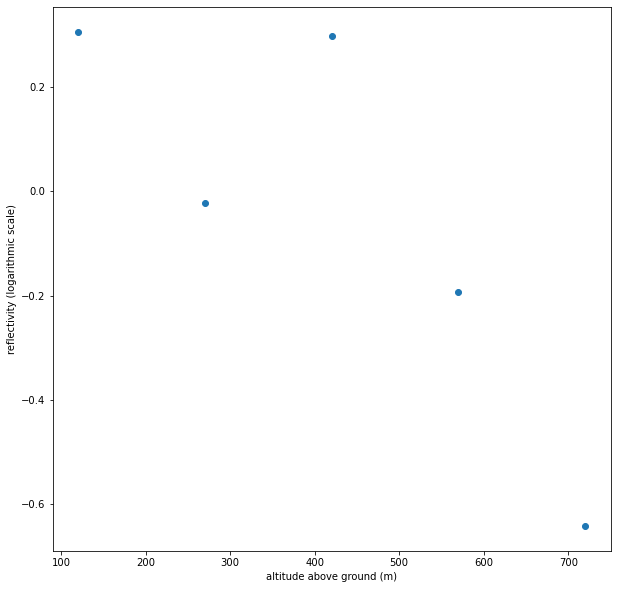

In [15]:
fig = pl.figure(figsize=(10, 10))
pl.scatter(altbins, reflects)
pl.xlabel("altitude above ground (m)")
pl.ylabel("reflectivity (logarithmic scale)")

It is evident that in the raw (unmasked data), we don't see the expected negative linear relationship between average dBZ and altitude.